# NLP project


Project 21: Automatic Summarization  

We shall consider structured document containing a title, abstract and a set of subsections. We would like to build a text summarizer such that tracks important keywords in the document. For this purpose, the first step is identify these keywords.  

In [ ]:
pip install --upgrade pip

In [ ]:
!pip list
# tarkista löytyykö: lxml, html5lib, requests, selenium, webdriver-manager
# lisäohjeita task1

In [9]:
#jos nltk ei löydy asenna -> ! pip install nltk
import nltk
nltk.download("stopwords")
#from nltk.cluster.util import cosine_distance

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dark\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## TASK 1
Assume the initial input is given as html document (choose an example of your own), we hypothesize that important keywords are initially contained in the words of titles, abstract and possibly titles of subsections of the document. Suggest a simple python script that inputs an html document and outputs the lists of words in the title, abstract and title of section/subsections.

In [44]:
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time
# Kaikki sivut ei anna koko html bodyä käyttämällä pelkkää requestia. Seleniumilla näyttää toimivan useammilla. 
# pip install -U selenium
# pip install webdriver-manager
# jos käytät anacondaa eikä meinaa toimia niin kokeile myös $ conda update pip

#Collect title, subtitles and abstract from html file

url = "https://ieeexplore.ieee.org/document/6809191"
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)

# Wait for page to fully load
time.sleep(3)

soup = BeautifulSoup(driver.page_source, 'lxml')
print(soup)

# Headline
headline = soup.find("h1", {"class": "document-title"}).text
print("Headline: {}\n".format(headline))

# Abstact
abstract = soup.find("div", {"class": "abstract-text"}).text
print("{}\n\n".format(abstract))

# Titles of sections
article = soup.find("div", {"id": "article"})
if article == None:
    print("Article is None")
# Saattaa joskus heittää erroria article = None, kokeilee vaan uudestaan niin pitäis toisella kertaa mennä
sectionTitles = article.find_all("h3")
secTitles = ""
print("Section titles:")
for title in sectionTitles:
    print("{}".format(title.text))
    secTitles += title.text
    secTitles += ".\n"

# Titles of subsections
subsectionTitles = article.find_all("h4")
subsecTitles = ""
print("\nSubsection titles:")
for title in subsectionTitles:
    print("{}".format(title.text))
    subsecTitles += title.text
    subsecTitles += ".\n"
    
driver.close()

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 95.0.4638
[WDM] - Get LATEST driver version for 95.0.4638
[WDM] - There is no [win32] chromedriver for browser 95.0.4638 in cache
[WDM] - Get LATEST driver version for 95.0.4638
[WDM] - Trying to download new driver from https://chromedriver.storage.googleapis.com/95.0.4638.54/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\Dark\.wdm\drivers\chromedriver\win32\95.0.4638.54]
C:\Users\Dark\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  del sys.path[0]


<html class="js postmessage history draganddrop borderimage borderradius boxshadow textshadow cssgradients csstransforms csstransforms3d csstransitions generatedcontent localstorage sessionstorage" lang="en-US"><head><style type="text/css">@charset "UTF-8";[ng\:cloak],[ng-cloak],[data-ng-cloak],[x-ng-cloak],.ng-cloak,.x-ng-cloak,.ng-hide:not(.ng-hide-animate){display:none !important;}ng\:form{display:block;}.ng-animate-shim{visibility:hidden;}.ng-anchor{position:absolute;}</style><script async="" src="//tags.tiqcdn.com/utag/ieeexplore/main/prod/utag.js" type="text/javascript"></script><script async="" src="https://securepubads.g.doubleclick.net/tag/js/gpt.js" type="text/javascript"></script><script type="text/javascript">

var home = {	
			metadata:{
				searchCount: '5 450 753',
				logoRelPath: '/customer_logos',
				thirdParthAuth: false,
				currentPage:  'document',
				xploreVirtual:'https://ieeexplore.ieee.org',
				isWebAccount: false,
				isProvisioned: false,
				globalNotifi

In [45]:
paragraphs = article.find_all("p")
fullText = ""
for paragraph in paragraphs:
    fullText += paragraph.text
    fullText += "\n"
print(fullText)

The most computationally expensive part of many computer vision algorithms consists of searching for the most
 similar matches to high-dimensional vectors, also referred to as nearest neighbor matching. Having an efficient
 algorithm for performing fast nearest neighbor matching in large data sets can bring speed improvements of several
 orders of magnitude to many applications. Examples of such problems include finding the best matches for local image
 features in large data sets [1][2]
 clustering local features into visual words using the k-means or similar algorithms 
[3], global image feature matching for scene recognition [4], human pose
 estimation [5], matching deformable shapes for object recognition 
[6] or performing normalized cross-correlation (NCC) to compare image patches
 in large data sets [7]. The nearest neighbor search problem is also of major
 importance in many other applications, including machine learning, document retrieval, data compression,
 bio-informatics, 

In [46]:
import yake

In [47]:
#Keyword search and analysis

w_extractor = yake.KeywordExtractor()

language = "en"
max_ngram_size = 2
deduplication_threshold = 0.9
numOfKeywords = 50 #alunperin 10

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(fullText)

for kw in keywords:
    print(kw)


('nearest neighbor', 0.0007766664386593746)
('neighbor search', 0.0009515296458451615)
('search', 0.001102385791926284)
('data set', 0.0013124989843824467)
('data', 0.0016705437392343825)
('data sets', 0.0016935470766225118)
('tree', 0.002431854440219337)
('neighbor', 0.002819482141185512)
('nearest', 0.0029966070668561197)
('k-means tree', 0.0030304830973392006)
('search k-means', 0.003061536743563306)
('priority search', 0.0038510474675561117)
('algorithm', 0.00413985033732821)
('set', 0.005164174884134092)
('search time', 0.0059403769268330025)
('search performance', 0.006225227405838436)
('trees', 0.006589541063820138)
('algorithms', 0.0072447380903243675)
('neighbors', 0.007518619043161366)
('search algorithms', 0.007862189139195149)
('sets', 0.007907642791330329)
('theta', 0.00800827174538274)
('neighbor algorithm', 0.008231117866120125)
('approximate nearest', 0.00870763924601712)
('k-means', 0.00903064318501427)
('approximate search', 0.009420519509769775)
('performance', 0.009

## TASK 2
Write down a simple python script that allows you to output the histogram of word frequency in the document, excluding the stopwords (see examples in online NLTK book). Use SpaCy named-entity tagger to identify person-named entities and organization-named entities in the document.

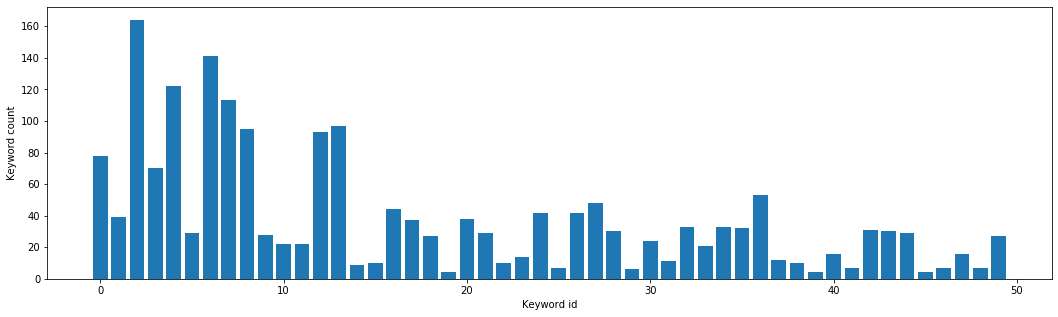

In [48]:
#from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np

#Calculate the word frequencies and plot the histogram

#Purkkapallolla koko artikkeli -> string
article_readable = "{}\n".format(headline)

#article_readable += (article.find('div', class_="article-content").h1.text) + " "
article_readable += "{}\n".format(abstract)

for sectionTitle in sectionTitles:
    article_readable += "{} ".format(sectionTitle.text)

for subsectionTitle in subsectionTitles:
    article_readable += "{} ".format(subsectionTitle.text)
    
article_readable += "\n{}".format(fullText)
    
#print(article_readable)
#Purkkapallo suoritettu

stopwords = stopwords.words("english")
#print(stopwords)

#Remove stopwords from the keywords list
keywords_only, keywords_nums = zip(*keywords) 
keywords_no_sw =  [word for word in keywords_only if not word in stopwords]
keywords_counts = []

for kw in keywords_no_sw:
    kw_count = article_readable.count(kw)
    keywords_counts.append(kw_count)

#print(keywords_no_sw)
#print(keywords_counts)
    
#Plotting the histogram
fig, ax = plt.subplots(figsize=(18,5))
plt.bar(np.arange(len(keywords_no_sw)), keywords_counts, align='center')
plt.ylabel('Keyword count')
plt.xlabel('Keyword id')
plt.show()


In [ ]:
### Count histogram from every word manually ###
charsToRemove = ".,():"
for char in charsToRemove:
    article_readable = article_readable.replace(char, '')

article_readable = article_readable.lower()
wordList = article_readable.split()
wordList = [word for word in wordList if word not in stopwords]
wordCounts = dict()

for word in wordList:
    if word in wordCounts:
        wordCounts[word] += 1
    else:
        wordCounts[word] = 1

wordCounts = sorted(wordCounts.items(), key=lambda x: x[1], reverse=True)
for i in range(50):
    print("{}".format(wordCounts[i]))
wordCounts = wordCounts[0:20]

words = list(zip(*wordCounts))[0]
occurency = list(zip(*wordCounts))[1]
fig, ax = plt.subplots(figsize=(18,5))
plt.bar(np.arange(len(words)), occurency, align='center')
plt.xticks(np.arange(len(words)), words)
plt.ylabel('Keyword count')
plt.xlabel('Keyword id')
plt.show()

In [ ]:
#Use SpaCy to identify person-named entities and organization-named entities
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

#vinkkiä https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da

#Identifying person and organization-named entities
nlp = en_core_web_sm.load()
doc = nlp(article_readable)

#Print only ORG or PERSON labeled entities
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            if ent.label_ == "ORG" or ent.label_ == "PERSON":
                print(ent.text+ " - " + ent.label_)
    else:
        print("No named entities found.")
        
show_ents(doc)

"""
for X in doc.ents:
    print("{} - {}".format(X.text, X.label_))
"""


## TASK 3

We would like the summarizer to contain frequent wording (excluding stopwords) and as many named-entities as possible. For this purpose, use the following heuristic to construct the summarizer. First we shall assume each sentence of the document as individual sub-document. Use TfIdf vectorizer to output the individual tfidef score of each word of each sentence (after initial preprocessing and wordnet lemmatization stage). Then consider only sentences that contain person or organization named-entities and use similar approach to output the tfidf score of the named-entities in each sentence. Finally construct the sentence (S) weight as a  weighted sum:
<br>
$$S_{weight}=\sum_{w\varepsilon S}W_{TfiDf}+2\sum_{NM\varepsilon S}NM_{TfiDf}+POS_s$$
<br>
where NMTfiDF stands for the TfIdF of named-entity NM in sentence S.  POSS corresponds to the sentence weight associated to the location of the sentence. So that the sentence location weight will be maximum (1) if located in the title of the document, 0.5 if located  in the title of one of the subsection, 0.25 if located in the title one of the subsubsection, 0.1 if located in one representative object of the document, and 0 if located only in the main text. Make sure to normalize the term tfidf and Nm tfidf weights and suggest a script to implement the preceding accordingly, so that the summarizer will contain the 10 sentences with the highest Sweight scores.  


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
weights = {
    "title": 1,
    "sectionTitle": 0.5,
    "subsectionTitle": 0.25,
    "abstract": 0.1,
    "else": 0.0
}

In [10]:
# Preprocess
def preProcess(document):
    stopwords = list(set(nltk.corpus.stopwords.words('english')))
    stemmer = SnowballStemmer("english")
    WN_lemmatizer = WordNetLemmatizer()

    sentences = sent_tokenize(document)
    #print(sentences)
    # List of lemmatized words for each sentence
    tokens = []
    tokensInSentences = []
    processedSentences = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        words = [WN_lemmatizer.lemmatize(word, pos="v") for word in words]

        # get rid of numbers and Stopwords
        words = [word for word in words if word.isalpha() and word not in stopwords]
        tokens.extend(words)
        tokensInSentences = ([words])
        processedSentences.append(' '.join(word for word in words))

    #print(len(lauseet))
    #print(lauseet[0])
    return tokens, tokensInSentences, processedSentences
    

In [ ]:
def tfidf(corpus, position):
    Tfidf = TfidfVectorizer(use_idf=True)
    #Tfidf.fit(word_count_vecotr)
    fitted_vectorizer = Tfidf.fit(corpus)
    first_vector_tfidfvectorizer = fitted_vectorizer.transform(corpus).toarray()
    feature_names = Tfidf.get_feature_names()

    #print(len(feature_names))
    #print(feature_names)
    #print(first_vector_tfidfvectorizer.shape)
    scores = []
    #print(first_vector_tfidfvectorizer)
    for i in range(len(first_vector_tfidfvectorizer)):
        score = 0
        for j in range(len(first_vector_tfidfvectorizer[i])):
            score = score + first_vector_tfidfvectorizer[i][j]

        scores.append((i, score + weights[position]))

    return(scores)

In [ ]:
# Title
tokens, tokensInSentences, processedSentences = preProcess(headline)
tfidfScores = tfidf(processedSentences, "title")
print("{}\n".format(tfidfScores))

# Section title
tokens, tokensInSentences, processedSentences = preProcess(secTitles)
tfidfScores = tfidf(processedSentences, "sectionTitle")
print("{}\n".format(tfidfScores))

# Subsection title
tokens, tokensInSentences, processedSentences = preProcess(subsecTitles)
tfidfScores = tfidf(processedSentences, "subsectionTitle")
print("{}\n".format(tfidfScores))

# Abstract
tokens, tokensInSentences, processedSentences = preProcess(abstract)
tfidfScores = tfidf(processedSentences, "abstract")
print("{}\n".format(tfidfScores))

# Text body
tokens, tokensInSentences, processedSentences = preProcess(fullText)
tfidfScores = tfidf(processedSentences, "else")
print("{}\n".format(tfidfScores))


## TASK 4
Test the above approach with Opinosis dataset available at https://kavita-ganesan.com/opinosis-opinion-dataset/#.YVw6J5ozY2x,  and record the corresponding Rouge-2 and Rouge-3 evaluation score. 

In [ ]:
#Rouge 2 ja 3 scoring
https://towardsdatascience.com/the-ultimate-performance-metric-in-nlp-111df6c64460


In [ ]:
#pip install git+git://github.com/bdusell/rougescore.git

'''
In ROUGE, a "peer" summary produced by a machine summarization system is compared against 
one or more hand-written "model" summaries and then assigned a score from 0 to 1. This score is the
F-measure of recall vs. precision, and the evaluator can adjust a parameter α to control whether this 
score favors recall (does the peer summary contain all of the information in the model summaries?) 
or precision (does the peer summary contain only information in the model summaries?). 

When α ≈ 0, this score favors recall; when α ≈ 1, it favors precision. 
In the DUC conferences, α was set to 0, and a hard length limit was imposed on generated summaries. 
The original ROUGE implementation uses α = 0.5 by default.
'''



In [39]:
#testi teksti
peer = """
, and is very, very accurate .
 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .
 This function is not accurate if you don't leave it in battery mode say, when you stop at the Cracker Barrell for lunch and to play one of those trangle games with the tees .
 It provides immediate alternatives if the route from the online map program was inaccurate or blocked by an obstacle .
 I've used other GPS units, as well as GPS built into cars   and to this day NOTHING beats the accuracy of a Garmin GPS .
 It got me from point A to point B with 100% accuracy everytime .
 It has yet to disappoint, getting me everywhere with 100% accuracy .
0 out of 5 stars Honest, accurate review, , PLEASE READ !
 Aside from that, every destination I've thrown at has been 100% accurate .
In closing, this is a fantastic GPS with some very nice features and is very accurate in directions .
 Plus, I've always heard that there are  quirks  with any GPS being accurate, having POIs, etc .
 DESTINATION TIME, , This is pretty accurate too .
 But, it's always very accurate .
 The map is pretty accurate and the Point of interest database also is good .
 Most of the times, this info was very accurate .
I've even used it in the  pedestrian  mode, and it's amazing how accurate it is .
  ONLY  is only accurate when an ad says,  Top sirloin steak, ONLY $1 .
 The most accurate review stated that these machines are adjunct to a good map and signs on the interstate .
 The directions are highly accurate down to a  T  .
 Depending on what you are using it for, it is a nice adjunct to a travel trip and the directions are accurate and usually the quickest, but not always .
 The screen is easy to see, the voice tells you where you are and it's very accurate .
 It was accurate to the minute when it told me when I would arrive home .
0 out of 5 stars GPS Navigator doesn't navigate accurately on a straight road .
 I was familiar with the streets and only used the Nuvi to get an accurate arrival time estimate .
 but after that it is very easy and quite accurate to use .
 The accuracy at this point is very good .
While the 255W routing seems generally accurate and logical, on my first use I discovered that it does have some errors in its internal map .
 Bottom line is I wanted a unit that is accurate and had reliable satellite connection .
 I've used it around town and find it to be extremely accurate .
I found the maps to be inaccurate at first, but after I updated them from Garmin's website everything is golden .
 A lot of my friends' addresses are inaccurate by any GPS .
 It loads quickly, have pretty accurate directions, and can recalculate quickly when I miss a turn .
 Because the accuracy is good to the street address level, it may not be able to guide you to the exact location if your destination is inside a shopping mall .
I updated to the latest 2010 map soon after I received the unit, so the map is accurate to me .
 I was blown away at the accuracy and routing capability this thing had .
 I used it the day I bought it,   and then this morning, and as soon as it comes on it is  ready to navigate  The only downfall of this product, and the only reason I did not give it 5 stars is the fact that the speed limit it displays for the road you are on isn't 100% accurate .
 If your looking for a nice, accurate GPS for not so much money, got with this one .
0 out of 5 stars Inexpensive, accurate, plenty of features, August 6, 2009
 The only glitch I have found so far is that the speed limits are not 100% accurate, although the GPS, amazingly, is able to very accurately tell you how fast your vehicle is moving .
 I was a little disappointed in the inaccuracy of the posted speed limit, as I'm guilty of not paying close enough attention to those signs, especially w  interstate speed traps that are constantly changing up and down .
 The closest one that gives the most accurate route that I usually take is the Navigon .
 After 2 weeks, it has yet to make a mistake, and is always completely accurate ,  even to the point of telling me which side of the street my destination is on .
 It has worked well for local driving giving accurate directions for roads and streets .
The estimated time to arrival does not seem to calculate the travelling time accurately .
Accuracy is as good as any other unit, they all sometimes tell you you have arrived when you haven't, or continue to tell you to turn when you're already there .
 Accuracy is determined by the maps .
 Less traveled rural roads will not be accurate on any unit .
 Accuracy is within a few yards .
What the 255w does best is find a street address, business, point of interest, hospital or airport and give you turn, by, turn directions with amazing accuracy .
 The Garmin is loaded with very accurate maps that generally know the roads in even the remotest areas .
I'm really glad I bought it though, and like the easy to read graphics, the voice used to tell you the name of the street you are to turn on, the uncannily accurate estimates of mileage and time of arrival at your destination .
My new Garmin 255w had very Easy Set Up, Accurate Directions to locations, User Friendly Unit to anyone in my vehicle who tried it .
 I had a GPS 10, years ago when I owned a boat that was difficult to use and with very poor accuracy so I had assumed that the road GPS wasn't any better .
 Practiced visiting places I already knew to see how accurate the directions and maps would be .
 Easy to use, excellent accuracy, nice and intuitive interface .
 The directions provided have all been quite accurate thus far .
,  Very Accurate but with one small glitch I found ,  I'll explain in the CONS
This is a great GPS, it is so easy to use and it is always accurate .
Very easy to operate and pretty accurate as well, only led me astray once and that was in northern Maine where roads are few and paved ones fewer .
 Easy to use and amazed at how accurate this item is .
To date it's been a very easy to use and accurate .
 Mounted really easily and has been very accurate .
 seems to be rather accurate .
 It was accurate on determing original directions and recalculating when necessary .
Highly accurate, POIs are great .
 I can't believe how accurate and detailed the information estimated time of arrival,speed limits along the way,and detailed map of my route, to name a few .
 Speed of calculation, accuracy, and simplicity of operation are top notch .
"""


model = [
    """The voice is a bit robotic.
    The voice is very clear and loud enough.""",
    """Voice is clear and sweet.
    Voice commands are kindly fantastic.""",
    """The voice is very clear and loud.""",
    """The voices sound robotic.
    TTS mode is the most problematic.""",
    """255W garmin gps has more than 750 voices but the most of them sound like robots."""
]

In [40]:
import rougescore as rouge

rougeBi = rouge.rouge_2(peer, model, 1)
print("Rouge 2: ", rougeBi)
rougeTri = rouge.rouge_3(peer, model, 1)
print("Rouge 3: ", rougeTri)

Rouge 2:  0.010484119642306507
Rouge 3:  0.008789514263685428


In [32]:
#tulosten vertailu toisella laskurilla
from rouge_score import rouge_scorer

In [43]:
scorer = rouge_scorer.RougeScorer(['rouge2', 'rouge3'], use_stemmer=False)
scores = scorer.score(peer, "The voice is a bit robotic. The voice is very clear and loud enough.")

print(scores)

{'rouge2': Score(precision=0.3076923076923077, recall=0.00338409475465313, fmeasure=0.0066945606694560665), 'rouge3': Score(precision=0.0, recall=0.0, fmeasure=0.0)}


## TASK 5

[x] We would like to improve the summarization by taking into account the diversity among the sentence in the sense that we would like to minimize redundancy among sentences. For this purpose, we shall use the sentence-to-sentence semantic similarity introduced in the NLP lab. 

[x] Next, instead of recording only the 10 sentences with highest Sweight scores, we shall record the 20 top sentences in terms of $S_{weight}$ scores. Then the selection of the top 10 sentences among the 20 sentences follows the following approach. 

[x] First, order the 20 sentences in the decreasing order of their $S_{weight}$ scores, say S1, S2, …, S20 (where S1 is the top ranked and S20 the 20th ranked sentence). 

[x] Second, we shall assume that S1 is always included in the summarizer, we shall then attempt to find the other sentences among S2 till S20 to be included into the summarizer. 

[x] Calculate the sentence-to-sentence similarity Sim(S1,Si) for i=1 to 20, the Sentence Sj that yields the minimum similarity with S1 will therefore be included in the summarizer. 

[ ] Next, for each of the remaining sentences Sk (with k different from 1 and j), we calculate the sentence similarity with Sj. Therefore the sentence Sp that yields minimum value of “Sim(Sp, S1)+Sim(Sp,Sj)” will be included in the summarizer (Note: the quantity Sim(Sp, S1) is already calculated in previous step).  

[ ] Similarly in the next phase, we should select a sentence Sl (l different from 1, j and k) so that  “Sim(Sl, S1)+Sim(Sl,Sj)+Sim(Sl,Sp)”, Etc.. 

[ ] You then stop once you reached 10 sentences included in the summarizer. 

Suggest a script that includes this process.. and illustrate its functioning in the example you chosen in 1).

In [ ]:
kirjoitan tähän itselleni että pysyn ohjeiden perässä
1.Luo 20 lauseen lista, missä lauseiden s(weight) pisteet ovat suurimmat (s1,s2,s3,...,s20)
2.s1 on tiivistelmän ensimmäinen lause 
    2.1 poista s1 listalta
3.Vertaa loppuja lauseita s1. Lause joka on vähiten samanlainen s1 kanssa lisätään tiivistelmään, ja kutsutaan s(j)
    3.1 poista s(j) listalta
4.Vertaa loppuja lauseita s(j) ja taas alin arvo lisätään tiivistelmään. Lisätty lause s(p)
    4.1 poista lause

In [54]:
sentences = [
    "There have been days when I wished to be separated from my body, but today wasn’t one of those days.",
    "There are no heroes in a punk rock band.",
    "In the end, he realized he could see sound and hear words.",
    "She had a habit of taking showers in lemonade.",
    "He hated that he loved what she hated about hate.",
    "Mr. Montoya knows the way to the bakery even though he's never been there.",
    "Karen realized the only way she was getting into heaven was to cheat.",
    "Thirty years later, she still thought it was okay to put the toilet paper roll under rather than over.",
    "He appeared to be confusingly perplexed.",
    "Sometimes you have to just give up and win by cheating.",
    "It's never been my responsibility to glaze the donuts.",
    "Mom didn’t understand why no one else wanted a hot tub full of jello.",
    "He poured rocks in the dungeon of his mind.",
    "He is good at eating pickles and telling women about his emotional problems.",
    "He picked up trash in his spare time to dump in his neighbor's yard.",
    "I thought red would have felt warmer in summer but I didn't think about the equator.",
    "The family’s excitement over going to Disneyland was crazier than she anticipated.",
    "You're good at English when you know the difference between a man eating chicken and a man-eating chicken.",
    "With the high wind warning",
    "This made him feel like an old-style rootbeer float smells."
            ]

In [55]:
print(len(sentences))

20


In [10]:
#download larger pipeline package for spaCy
python -m spacy download en_core_web_lg #tarkempi mutta 770mb kokoinen

python -m spacy download en_core_web_sm #paljon pienempi mutta ei yhtä tarkka

SyntaxError: invalid syntax (<ipython-input-10-f5d1a2650bdf>, line 2)

In [56]:
#s1 määritys
picked_sentences = []

#choose dictionary
nlp = spacy.load("en_core_web_lg")
#nlp = spacy.load("en_core_web_md")

#löydä ensimmäinen lause, korkein s(weigth)
for sentence in sentences: 
    #lisää koodi s(weight) laskemiseen, tai valitse ensimmäinen lause jos lista on järjestyksessä
    s1 = sentence

#poista valinta listasta ja lisää tiivistelmä listaan    
picked_sentences.append(s1)
sentences.remove(s1)

print(picked_sentences)

['This made him feel like an old-style rootbeer float smells.']


In [58]:
#Loppujen yhdeksän lauseen valinta

#lista samanlaisuus pisteistä
sim_score = []

#while pyörii kunnes 10 lausetta on löydetty
while(len(picked_sentences)<10):
    sim_score.clear()
    
    for sentence in sentences:
        nlp_sentence = nlp(sentence)
        score = 0

        for p_sentence in picked_sentences:
            #vertaa kahta lausetta
            nlp_p_sentence = nlp(p_sentence)

            score += nlp_p_sentence.similarity(nlp_sentence)
                
        sim_score.append(score)
        
        
    print(sim_score)
    min_value = min(sim_score)
    min_index = sim_score.index(min_value)   

    print("Sentences left in the list: " + str(len(sentences)))
    print("Smallest value: " + str(min_value))
    print(sentences[min_index])

    picked_sentences.append(sentences[min_index])
    sentences.remove(sentences[min_index])



[0.837221667939921, 0.7592044938971315, 0.8343158371391274, 0.8157339916726738, 0.7933869812580329, 0.839061837075977, 0.8373327600256472, 0.8537609015849631, 0.7111286683552214, 0.8201185021178671, 0.859448095177096, 0.8636015698071235, 0.8002430021458958, 0.8274451048475386, 0.7971951652155624, 0.8422850297329965, 0.7911469812630152, 0.8515912033926233, 0.6724406481826521]
Sentences left in the list: 19
Smallest value: 0.6724406481826521
With the high wind warning
[1.5781390016722328, 1.4272689899728985, 1.580359282164026, 1.5456324482652652, 1.3927006266568862, 1.5448174770159335, 1.554226341062352, 1.5874181427100102, 1.3218289011368223, 1.5418594409211948, 1.5807225926814295, 1.554277207365841, 1.5198816225582557, 1.5475175840011102, 1.5020883301200705, 1.547116762422606, 1.495429337193636, 1.5675989146449436]
Sentences left in the list: 18
Smallest value: 1.3218289011368223
He appeared to be confusingly perplexed.
[2.3960993138823476, 2.1017043456218465, 2.416278879141774, 2.2880

In [59]:
print("Summarized text")
print(picked_sentences)

Summarized text
['This made him feel like an old-style rootbeer float smells.', 'With the high wind warning', 'He appeared to be confusingly perplexed.', 'There are no heroes in a punk rock band.', 'He hated that he loved what she hated about hate.', "He picked up trash in his spare time to dump in his neighbor's yard.", 'The family’s excitement over going to Disneyland was crazier than she anticipated.', "You're good at English when you know the difference between a man eating chicken and a man-eating chicken.", 'He poured rocks in the dungeon of his mind.', 'Sometimes you have to just give up and win by cheating.']


## TASK 6

We would like to make the choice of keywords not based on histogram frequency but using the open source RAKE https://www.airpair.com/nlp/keyword-extraction-tutorial. Repeat the previous process of selecting the sentences that are associated to the ten first keywords generated by RAKE. Comment on the quality of this summarizer based on your observation

In [ ]:
#Repossa ollut asennus tiedosto ei kyennyt asentumaan windows ympäristössä ilman korjausta
git clone https://github.com/zelandiya/RAKE-tutorial
cd RAKE-tutorial

#Ennen asennusta mene setup.py tiedostoon ja poista slash (/) poluista: 
#package_dir={'nlp_rake': './'} ja 
#package_data={'nlp_rake': ['data/']}

#muutin "nlp-rake" nimen pelkäksi "rake" asennus tiedostossa.

#kuva setup_korjaus löytyy githubista, jonka jälkeen paketin asennus toimii
python setup.py install 



In [ ]:
#Asensin moduulin eri paikkaan kuin missä jupyter serveri polku, korjasin tällä polun
#import sys 
#sys.path.append("C:/NLP/RAKE-tutorial")

In [ ]:
import rake 
import operator

In [ ]:
#Korjaa polku, tiedosto löytyy githubista
rake_object = rake.Rake("C:/NLP/RAKE-tutorial/data/stoplists/SmartStoplist.txt", 5, 3, 4) 

In [ ]:
sample_file = open("C:/NLP/RAKE-tutorial/data/docs/fao_test/w2167e.txt", 'r') #aseta teksti minkä haluat käsitellä
text = sample_file.read()
sentenceList = rake.split_sentences(text)
print(sentenceList[0:1])


In [ ]:
keywords = rake_object.run(text)
#print("Keywords:", keywords[0:10]) #10 ensimmäistä
keywords_topten = []

for i in range(10):
    keywords_topten.append(keywords[i][0])
    
print(keywords_topten)

In [ ]:
#extract sentences using keywords
dct = {}
for sentence in sentenceList:
    dct[sentence] = sum(1 for word in keywords_topten if word in sentence)

rake_sentences = [key for key,value in dct.items() if value == max(dct.values())]


print("\n".join(rake_sentences))

In [ ]:
#Comparing results
print("Sentences in original text: {}, summarized amount: {}".format(len(sentenceList),len(rake_sentences)))

In [ ]:
Comment on results:

## TASK 7

It is also suggested to explore alternative implementations with larger number of summarization approaches implemented- https://github.com/miso-belica/sumy. Show how each of the implemented summarizer behaves when inputted with the same document you used in previous case.

In [ ]:
#https://github.com/miso-belica/sumy
pip install sumy

In [ ]:
from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

LANGUAGE = "english"
SENTENCES_COUNT = 10

In [ ]:
url = "https://en.wikipedia.org/wiki/Automatic_summarization"
parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
# or for plain text files
# parser = PlaintextParser.from_file("C:/NLP/RAKE-tutorial/data/docs/fao_test/w2167e.txt", Tokenizer(LANGUAGE))
# parser = PlaintextParser.from_string("Check this out.", Tokenizer(LANGUAGE))
stemmer = Stemmer(LANGUAGE)

summarizer = Summarizer(stemmer)
summarizer.stop_words = get_stop_words(LANGUAGE)

for sentence in summarizer(parser.document, SENTENCES_COUNT):
    print(sentence)

## TASK 8

Now we would like to compare the above summarizers and those in 3), 5) and 7) on a new dataset constructed as follows. First select an Elsevier journal of your own and select 10 papers highly ranked in the journal according to citation index (The journal papers should be well structured to contain Abstract, Introduction and Conclusion). 

For each of the ten papers, consider the introduction as the main document to seek to apply summarizer, and consider the Abstract and Conclusion as two golden summary of the document that you can use for assessment using ROUGE-1 and ROUGE-2 evaluation. 

Report in a table the evaluation score of each summarizer. 

In [ ]:
#Rouge 1 & 2 pisteytyts koodi


## TASK 9

Design a simple GUI that allows the user to input a text or a link to a document to be summarized and output the summarizer according to 3), algorithms implemented in 7)